# Using the Nodes dataset

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
    def visualize(self):
            G = nx.Graph()
            G.add_edges_from(self.visual)
            nx.draw_networkx(G)
            plt.show()


# Plotting the Nodes data

In [28]:
lines = []
with open('amazon_node_subset.txt') as f:
    lines = f.readlines()


new_lines = [s.replace("\n", "") for s in lines]

In [29]:
start, end  =[],[]
edges = []
for l in new_lines:


  first,second = l.split("\t")
  start.append(first)
  end.append(second)
  
  edge = []
  edge.append(first)
  edge.append(second)

  edges.append(edge)

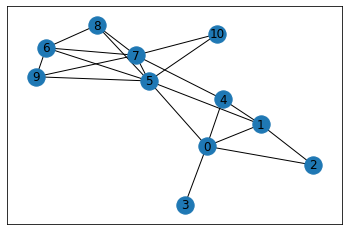

In [30]:
G1 = GraphVisualization()

for i in range(len(start)):

  G1.addEdge(start[i], end[i])

G1.visualize()

In [31]:
edges

[['0', '1'],
 ['0', '2'],
 ['0', '3'],
 ['0', '4'],
 ['0', '5'],
 ['1', '0'],
 ['1', '2'],
 ['1', '4'],
 ['1', '5'],
 ['4', '7'],
 ['5', '6'],
 ['5', '7'],
 ['5', '8'],
 ['5', '9'],
 ['5', '10'],
 ['6', '5'],
 ['6', '7'],
 ['6', '8'],
 ['6', '9'],
 ['7', '5'],
 ['7', '8'],
 ['7', '9'],
 ['10', '5'],
 ['10', '7']]

In [32]:
from collections import defaultdict
from collections import OrderedDict

# Function to build the graph

graph = defaultdict(list)


def build_graph():


    # Using the Edge defined above

#    graph = defaultdict(list)
     
    # Loop to iterate over every
    # edge of the graph
    for edge in edges:
        a, b = edge[0], edge[1]
         
        # Creating the graph
        # as adjacency list
        graph[a].append(b)
        graph[b].append(a)

    return graph
 
if __name__ == "__main__":
    graph = build_graph()
     
    print(graph)

defaultdict(<class 'list'>, {'0': ['1', '2', '3', '4', '5', '1'], '1': ['0', '0', '2', '4', '5'], '2': ['0', '1'], '3': ['0'], '4': ['0', '1', '7'], '5': ['0', '1', '6', '7', '8', '9', '10', '6', '7', '10'], '7': ['4', '5', '6', '5', '8', '9', '10'], '6': ['5', '5', '7', '8', '9'], '8': ['5', '6', '7'], '9': ['5', '6', '7'], '10': ['5', '5', '7']})


## Shortest Path between two nodes of graph

In [33]:
# Python implementation to find the
# shortest path in the graph using
# dictionaries
 
# Function to find the shortest
# path between two nodes of a graph
def BFS_SP(graph, start, goal):
    explored = []
     
    # Queue for traversing the
    # graph in the BFS
    queue = [[start]]
     
    # If the desired node is
    # reached
    if start == goal:
        print("Same Node")
        return
     
    # Loop to traverse the graph
    # with the help of the queue
    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        # Condition to check if the
        # current node is not visited
        if node not in explored:
            neighbours = graph[node]
             
            # Loop to iterate over the
            # neighbours of the node
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                # Condition to check if the
                # neighbour node is the goal
                if neighbour == goal:
                    print("Shortest path = ", *new_path)
                    return
            explored.append(node)
 
    # Condition when the nodes
    # are not connected
    print("So sorry, but a connecting"\
                "path doesn't exist :(")
    return
 
# Driver Code
if __name__ == "__main__":
     
    # Graph using dictionaries

    # Function Call
    BFS_SP(graph, '10', '2')

Shortest path =  10 5 0 2
